# MLZoomcamp 2022 - Session #6 - Homework

Author: José Victor

* Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text

## Loading the data

Use only the following columns:

* `latitude`,
* `longitude`,
* `housing_median_age`,
* `total_rooms`,
* `total_bedrooms`,
* `population`,
* `households`,
* `median_income`,
* `median_house_value`,
* `ocean_proximity`.
* Fill NAs with 0.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer` to turn the dataframe into matrices. 

In [2]:
cols = ["latitude", 
        "longitude", 
        "housing_median_age", 
        "total_rooms", 
        "total_bedrooms", 
        "population", 
        "households",
        "median_income",
        "median_house_value",
        "ocean_proximity"]

In [3]:
file_path = "/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/06-trees/data/housing.csv"
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data = df[cols].copy()
data.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data.total_bedrooms = data.total_bedrooms.fillna(0)

In [6]:
data.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
data.median_house_value = data.median_house_value.apply(np.log1p)

In [8]:
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [9]:
target = "median_house_value"
features = [col for col in cols if col != target]

train_size = 0.6
test_size = 0.2
val_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=test_size, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(train_size+test_size), random_state=1)

In [10]:
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient="records")
test_dict = X_test.to_dict(orient="records")
val_dict = X_val.to_dict(orient="records")

X_train = dv.fit_transform(train_dict)
X_test = dv.fit_transform(test_dict)
X_val = dv.fit_transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable.

* Train a model with `max_depth=1`.

Which feature is used for splitting the data?

* (X) `ocean_proximity=INLAND`
* ( ) `total_rooms`
* ( ) `latitude`
* ( ) `population`

In [11]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
print(export_text(model, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)

What's the RMSE of this model on validation?

* ( ) 0.05
* (X) 0.25
* ( ) 0.55
* ( ) 0.85

In [12]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X=X_train, y=y_train)
y_pred = rf.predict(X=X_val)
mse = mean_squared_error(y_true=y_val, y_pred=y_pred)
rmse_score = np.sqrt(mse)
print(f"RMSE: {rmse_score}")

RMSE: 0.24566012875324933


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving?

* ( ) 10
* ( ) 55
* ( ) 75
* (X) 150

In [13]:
rmse_score_list = []

for n in range(10,210,10):

    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X=X_val)
    mse = mean_squared_error(y_true=y_val, y_pred=y_pred)
    rmse_score = np.sqrt(mse)
    rmse_score_list.append([n,rmse_score])

In [14]:
df_n_estimators = pd.DataFrame(rmse_score_list, columns=["n", "rmse"])

In [15]:
df_n_estimators.sort_values("rmse", ascending=False)

,n,rmse
0,10,0.245660
1,20,0.238831
2,30,0.235335
3,40,0.234257
4,50,0.232991
5,60,0.232767
7,80,0.232403
6,70,0.232337
8,90,0.232107
9,100,0.231928


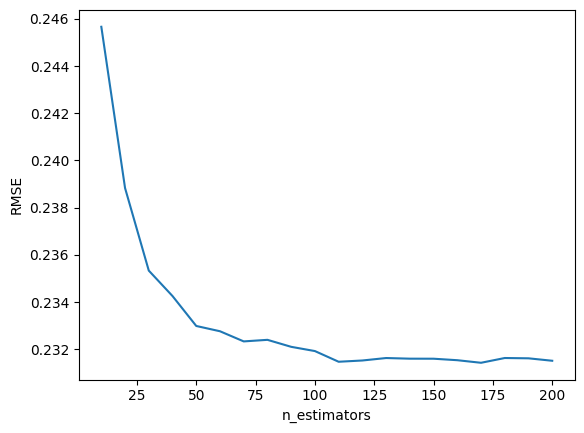

In [16]:
plt.plot(df_n_estimators.n, df_n_estimators.rmse)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.show()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_seed=1`

What's the best `max_depth`:

* ( ) 10
* ( ) 15
* ( ) 20
* (X) 25

In [17]:
rmse_score_list = []

for depth in [10, 15, 20, 25]:
    for n in range(10,210,10):

        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X=X_train, y=y_train)
        y_pred = rf.predict(X=X_val)
        mse = mean_squared_error(y_true=y_val, y_pred=y_pred)
        rmse_score = np.sqrt(mse)
        rmse_score_list.append([depth,n,rmse_score])

In [18]:
df_depth = pd.DataFrame(rmse_score_list, columns=["depth", "n", "rmse"])

In [19]:
df_depth[df_depth.rmse == df_depth.rmse.min()]["depth"]

71    25
Name: depth, dtype: int64

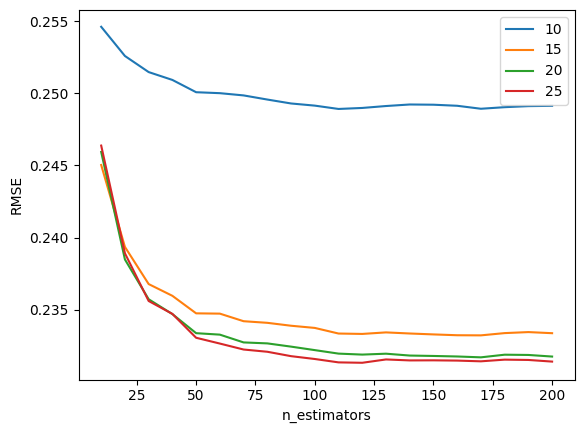

In [20]:
for depth in [10,15,20,25]:
    plt.plot(df_depth[df_depth.depth == depth]["n"], df_depth[df_depth.depth == depth]["rmse"], label=str(depth))
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

What's the most important feature?

* ( ) `total_rooms`
* (X) `median_income`
* ( ) `total_bedrooms`
* ( ) `longitude`

In [21]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X=X_train, y=y_train)
rf.feature_importances_

array([1.63873827e-02, 3.31454580e-02, 1.01255849e-01, 9.64702137e-02,
       3.63325843e-01, 2.48880276e-03, 3.10900842e-01, 3.56806263e-04,
       4.80369796e-04, 4.69876693e-03, 3.07769212e-02, 1.91716318e-02,
       2.05411131e-02])

In [22]:
max(rf.feature_importances_)

0.3633258427603735

In [23]:
list(rf.feature_importances_).index(max(rf.feature_importances_))

4

In [24]:
dv.get_feature_names()[list(rf.feature_importances_).index(max(rf.feature_importances_))]

/home/jvictor/vs_code/mlzoomcamp2022_jvscursulim/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'median_income'

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```python
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* (X) 0.3
* ( ) 0.1
* ( ) Both gives same

In [25]:
!pip install xgboost

In [26]:
import xgboost as xgb

In [27]:
features_names = dv.get_feature_names()

In [28]:
features_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [29]:
processed_features = []
for feature in features_names:
    if feature == "ocean_proximity=<1H OCEAN":
        feature = "ocean_proximity_gte_1H OCEAN"
        processed_features.append(feature)
    else:
        processed_features.append(feature)

In [30]:
processed_features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_gte_1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [31]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=processed_features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=processed_features)

In [32]:
rmse_score_list = []

for eta in [0.3, 0.1, 0.01]:

    xgb_params = {"eta": eta,
              "max_depth": 6,
              "min_child_weight": 1,
              "objective": "reg:squarederror",
              "nthread": 8,
              "seed": 1,
              "verbosity": 1}
    
    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    y_pred = model.predict(dval)
    mse = mean_squared_error(y_pred=y_pred, y_true=y_val)
    rmse = np.sqrt(mse)
    rmse_score_list.append((eta, rmse))

In [33]:
rmse_score_list

[(0.3, 0.2260957847928297),
 (0.1, 0.2305416021993131),
 (0.01, 4.264961152048471)]